In [ ]:
import matplotlib.pyplot as plt
import torch
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

from diffpose.deepfluoro import DeepFluoroDataset, Transforms
from diffpose.registration import SparseRegistration, vector_to_img

In [ ]:
specimen = DeepFluoroDataset(1)
height = 256
subsample = (1536 - 100) / height
delx = 0.194 * subsample

_, pose = specimen[0]
pose = pose.cuda()

drr = DRR(
    specimen.volume,
    specimen.spacing,
    sdr=specimen.focal_len / 2,
    height=height,
    delx=delx,
    x0=specimen.x0,
    y0=specimen.y0,
    reverse_x_axis=True,
    bone_attenuation_multiplier=2.5,
).to("cuda")

registration = SparseRegistration(drr, pose, parameterization="se3_log_map")

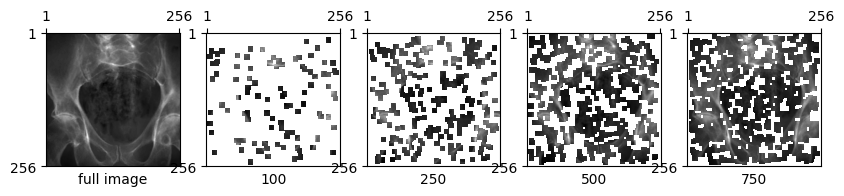

In [ ]:
# Generate images with different numbers of patches
imgs = []
n_patches = [None, 100, 250, 500, 750]
for n in n_patches:
    img, mask = registration(n, patch_size=13)
    if n is not None:
        img = vector_to_img(img, mask)
    imgs.append(img)

# Plot the images with various levels of sparsity
axs = plot_drr(torch.concat(imgs))
for ax, n in zip(axs, n_patches):
    if n is None:
        n = "full image"
    ax.set(xlabel=n)
plt.show()